# Training with old ntuple

# prepare

## 1 - Load modules

In [1]:
import sys
sys.path.append("..") # add self-defined module in the parent path
sys.path.append("../..") # add self-defined module in the parent path
import time

from array import array
import datetime
import keras.backend
from keras.models import Sequential, Model, load_model
from keras.layers import Concatenate, Dense, Input
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adagrad, SGD, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from run.get_arrays import *
from lfv_pdnn_code_v1.train import model, train_utils
from lfv_pdnn_code_v1.train.train_utils import *
from lfv_pdnn_code_v1.common.common_utils import *

Using TensorFlow backend.


In [2]:
# Constants
#old_bkg_path = "E:/data/lfv/ntuples_last_run/TestData/data_npy"  # Windows can recognize both "/" and "\"
old_bkg_path = "/home/yangz/analysis/lfv/pDNN-Code-for-LFV-v1.0/npys/old/data_npy"
#old_sig_path = "E:/data/lfv/ntuples_last_run/train_array_0909/data_npy/emu"
old_sig_path = "/home/yangz/analysis/lfv/pDNN-Code-for-LFV-v1.0/npys/old/data_npy/emu"

## 2 - Load old array
### a) load old background samples

In [3]:
xb_dict_old = get_old_bkg(old_bkg_path)

Loading new background array.
Organizing new background with dict: xb_dict_old.
Done.


### b) load old signal samples

In [4]:
xs_dict_old = get_old_sig(old_sig_path)

Loading old signal array.
Organizing old signal with dict: xs_dict_old.
Done.


## 1 - Define constants & functions for training.

In [5]:
print(xb_dict_old.keys())

dict_keys(['di_boson', 'drell_yan', 'top_quark', 'w_jets', 'z_ll', 'all'])


In [6]:
selected_features_emu = [0, 1, 2, 3, 5, 6, 7, 15, 16, 17, 18, 19]
selected_features_etau = [0, 1, 2, 3, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
selected_features_mutau = [0, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

plot_bkg_list = ['di_boson', 'drell_yan', 'top_quark', 'w_jets', 'z_ll']
plot_bkg_dict = {key:xb_dict_old[key] for key in plot_bkg_list}

## 2 - Example for using the code

In [ ]:
# Example for emu channel training:
xs, xb = get_input_array(xs_dict_old, '500GeV', xb_dict_old, 'all', -4) # -4 for emu
model_deep = model.Model_1016("model_test", len(selected_features_emu))
model_deep.prepare_array(xs, xb, selected_features_emu, -4, sig_weight=10000, bkg_weight=10000, test_rate=0.2)
model_deep.compile()
model_deep.train(batch_size=128, epochs=3, val_split=0.1, sig_class_weight=6., bkg_class_weight=1., verbose=0)
model_deep.save_model()

In [ ]:
# Example for showing performance
model_deep.show_performance(figsize=(16, 8))
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
model_deep.plot_scores_separate(ax[0], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=False)
model_deep.plot_scores_separate(ax[1], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=True)

Training array prepared.
> signal shape: (24810, 12)
> background shape: (152506, 12)
More than one valid model file found, try to specify more infomation.
Loading the last matched model path: models/model_test_mod1016_2019-10-29_v02.h5
Model loaded.
Model performance:


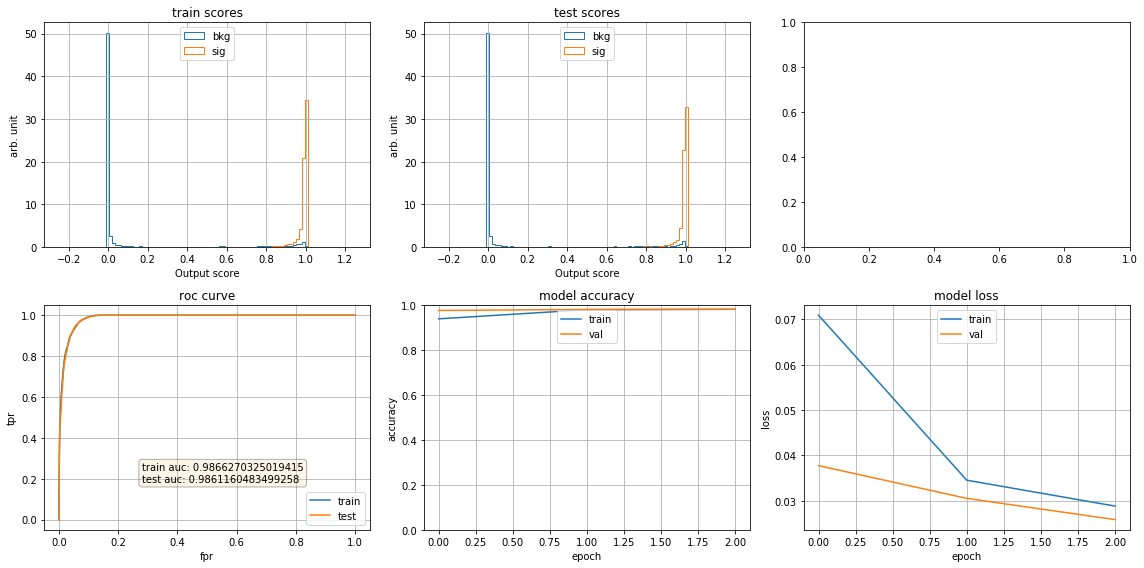

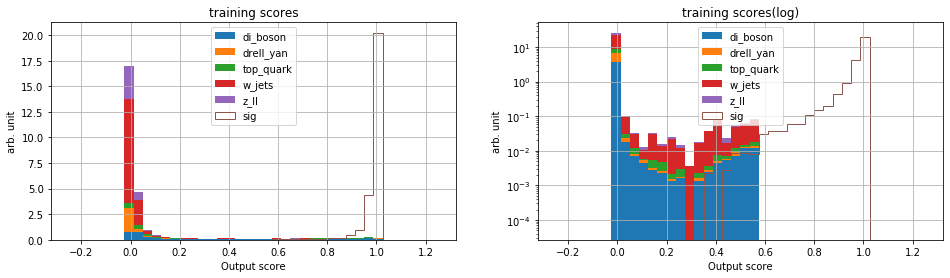

In [8]:
# Example for loading model and make plots
xs, xb = get_input_array(xs_dict_old, '500GeV', xb_dict_old, 'all', -4) # -4 for emu
model_load = model.Model_1016("model_load_test", len(selected_features_emu))
model_load.prepare_array(xs, xb, selected_features_emu, -4, sig_weight=10000, bkg_weight=10000, test_rate=0.2)
model_load.load_model('model_test')
model_load.show_performance(figsize=(16, 8))
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
model_load.plot_scores_separate(ax[0], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=False)
model_load.plot_scores_separate(ax[1], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                sig_arr=None, sig_weights=None, plot_title='training scores',
                                bins=40, range=(-0.25, 1.25), density=True, log=True)

### A) mass = 500 GeV

#### a) old ntuple
[emu]

In [ ]:
model_500_old = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '500GeV', "model_mass_500_emu", batch_size=64, epochs=30,lr_rate=0.1, dec=0.00005,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=5.)

*************************
[etau]

In [ ]:
train_single_mass(xs_dict_old, xb_dict_old, 'etau', -3, '500GeV', "model_mass_500_etau", epochs=30, selected_features = selected_features_etau)

**********
[mutau]

In [ ]:
train_single_mass(xs_dict_old, xb_dict_old, 'mutau', -2, '500GeV', "model_mass_500_mutau", epochs=30, selected_features = selected_features_mutau)

### B) mass = 1000 GeV

In [ ]:
model_1000_old = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '1000GeV', "model_mass_1000_emu", batch_size=128, epochs=20,lr_rate=0.3, dec=0.0005,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=30.)

### C) mass = 2000 GeV

#### a) old ntuple
[emu]

In [ ]:
model_2000_old = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '2000GeV', "model_mass_2000_emu", batch_size=128, epochs=20,lr_rate=0.3, dec=0.0005,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=100.)

*********
[etau] 

In [ ]:
train_single_mass(xs_dict_old, xb_dict_old, 'etau', -3, '2000GeV', "model_mass_2000_etau", epochs=30, 
                  selected_features = selected_features_etau, select_bkg_mass = True,
                  self_defined_mass = False, minm = 1800, maxm = 2200)

*********
[mutau]

In [ ]:
train_single_mass(xs_dict_old, xb_dict_old, 'mutau', -2, '2000GeV', "model_mass_2000_mutau", epochs=30, selected_features = selected_features_mutau)

## 2 - Train with 500 GeV mass point and full mass point (use old ntuple)

### A) Train with 500 GeV single mass point
#### a) emu

In [ ]:
model_single = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '500GeV', "model_mass_500_emu_single", epochs=30, 
                                 selected_features = selected_features_emu, select_bkg_mass = True)

### B) Train with full mass point

In [ ]:
model_total = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, 'all', "model_mass_all_emu", epochs=30, 
                                 selected_features = selected_features_emu, select_bkg_mass = True)

### B1) Train with full mass point, normalized before adding all mass point samples

In [ ]:
# Example for emu channel:
xs, xb = get_input_array(xs_dict_old, 'all_norm', xb_dict_old, 'all', -4) # -4 for emu
model_deep = model.Model_1016("model_name", len(selected_features_emu))
model_deep.prepare_array(xs, xb, selected_features_emu, -4, sig_weight=100000, bkg_weight=100000, test_rate=0.2)
model_deep.compile()
model_deep.train(batch_size=128, epochs=5, val_split=0.1, sig_class_weight=20., bkg_class_weight=1., verbose=1)
model_deep.save_model("./model/model_all_norm.h5")
model_deep.show_performance(figsize=(16, 8))
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
_ = model_deep.plot_scores_separate(ax[0], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                    sig_arr=None, sig_weights=None, plot_title='training scores',
                                    bins=40, range=(-0.25, 1.25), density=True, log=False)
_ = model_deep.plot_scores_separate(ax[1], plot_bkg_dict, plot_bkg_list, selected_features_emu,
                                    sig_arr=None, sig_weights=None, plot_title='training scores',
                                    bins=40, range=(-0.25, 1.25), density=True, log=True)

### B2) Train with min 1500 GeV

In [ ]:
model_min_1500_norm = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, 'min_1500', "model_mass_all_emu", batch_size=128, epochs=15,lr_rate=0.2, dec=0.00006,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=50.)

### B3) Train with max 2400 GeV, normalized before adding signal samples together

In [ ]:
model_max_2400_norm = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, 'max_2400_norm', "model_max_2400_norm", epochs=30, 
                                 selected_features = selected_features_emu, select_bkg_mass = True)

### B4) train with 3-point (normalized before add)
train with 500, 1000, 2000GeV

In [ ]:
model_3_point_norm = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '3point', "model_3_point_norm", batch_size=128, epochs=30,lr_rate=0.5, dec=0.0003,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=8.)

### B4) train with 4-point (normalized before add)
train with 500, 700, 1000, 2000GeV

In [ ]:
model_4_point_norm = train_single_mass(xs_dict_old, xb_dict_old, 'emu', -4, '4point', "model_4_point_norm", batch_size=128, epochs=30,lr_rate=0.5, dec=0.0003,
                                  selected_features = selected_features_emu, select_bkg_mass = False, bs_weight_ratio=8.)

## 4 Plot auc vs mass (with full mass train & 3-point mass train)
### A) Use model_total_norm (full mass train)
use mass +- 50GeV bin 

In [ ]:
mass_map = [500, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2200, 2400, 2600, 2800, 3000, 3500, 4000, 4500, 5000]
mass_map_test = [500, 700, 1000, 1500, 2000, 3000, 5000]

model_list = [model_500_old, model_2000_old, model_3_point_norm, model_total_norm]

#model_used = model_total_norm
#model_used = model_3_point_norm

# plot bkg scores with separately
bkg_plot_dict_emu = {}
for bkg_key in bkg_list:
    xb_emu_temp = modify_array(xb_dict_old[bkg_key], weight_id = -1, remove_negative_weight = True, select_channel = True, channel_id = -3,
                  select_mass = False, reset_mass = False, norm = False, shuffle = False)
    bkg_plot_dict_emu[bkg_key] = xb_emu_temp
    

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(16, 9))
##
for i, mass in enumerate(mass_map_test):
    for j in range(4):
        model_used = model_list[j]
        mass_name = "{}GeV".format(mass)
        sig_plot_emu = xs_dict_old[mass_name].copy()
        sig_plot_emu = modify_array(sig_plot_emu, weight_id=-1, norm=True)
        average = model_used.norm_average
        variance = model_used.norm_variance
        sig_plot_emu[:, 0:-2] = norarray(sig_plot_emu[:, 0:-2], average=average, variance=variance)
        sig_plot_emu_selected = get_part_feature(sig_plot_emu, selected_features_emu)

        ax[j,i].hist(model_used.get_model().predict(sig_plot_emu_selected), bins=50, 
                range=(-0.2, 1.2), weights=sig_plot_emu[:, -1], histtype='step', label='signal', density=True)
        ax[j,i].set_title(mass_name)
        ax[j,i].legend(loc='upper center')
        ax[j,i].set_xlabel("Output score")
        ax[j,i].set_ylabel("arb. unit")
        ax[j,i].grid()
plt.show()

### B) Use model_3_point_norm (3-point mass train)
use mass +- 50GeV bin 

In [ ]:
model_used = model_3_point_norm

mass_list = []
auc_list = []
for i in range(0, 16):
    mass = i * 100 + 500
    mass_min = mass - 50
    mass_max = mass + 50
    xs_emu = modify_array(xs_dict_old['all'], weight_id = -1, select_channel = True, channel_id = -4,
                          select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max)
    xb_emu = modify_array(xb_dict_old['all'], weight_id = -1, select_channel = True, channel_id = -4,
                          select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max)
    xs_emu_selected = get_part_feature(xs_emu, selected_features_emu)
    xb_emu_selected = get_part_feature(xb_emu, selected_features_emu)
    ys_emu = np.ones(len(xs_emu_selected))
    yb_emu = np.zeros(len(xb_emu_selected))
    x_emu = np.concatenate((xs_emu_selected, xb_emu_selected))
    y_emu = np.concatenate((ys_emu, yb_emu))
    predicti_y = model_used.get_model().predict(x_emu)
    fpr, tpr, threshold = roc_curve(y_emu, predicti_y)
    auc_value = auc(fpr, tpr)
    mass_list.append(mass)
    auc_list.append(auc_value)
plt.plot(mass_list, auc_list)
plt.ylim((0, 1))
plt.xlabel("mass GeV")
plt.ylabel("auc")
plt.show()

### B) Use model_4_point_norm (4-point mass train)
use mass +- 50GeV bin 

In [ ]:
model_used = model_4_point_norm

mass_list = []
auc_list = []
for i in range(0, 16):
    mass = i * 100 + 500
    mass_min = mass - 50
    mass_max = mass + 50
    xs_emu = modify_array(xs_dict_old['all'], weight_id = -1, select_channel = True, channel_id = -4,
                          select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max)
    xb_emu = modify_array(xb_dict_old['all'], weight_id = -1, select_channel = True, channel_id = -4,
                          select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max)
    xs_emu_selected = get_part_feature(xs_emu, selected_features_emu)
    xb_emu_selected = get_part_feature(xb_emu, selected_features_emu)
    ys_emu = np.ones(len(xs_emu_selected))
    yb_emu = np.zeros(len(xb_emu_selected))
    x_emu = np.concatenate((xs_emu_selected, xb_emu_selected))
    y_emu = np.concatenate((ys_emu, yb_emu))
    predicti_y = model_used.get_model().predict(x_emu)
    fpr, tpr, threshold = roc_curve(y_emu, predicti_y)
    auc_value = auc(fpr, tpr)
    mass_list.append(mass)
    auc_list.append(auc_value)
plt.plot(mass_list, auc_list)
plt.ylim((0, 1))
plt.xlabel("mass GeV")
plt.ylabel("auc")
plt.show()

# test area

In [ ]:
test_dict = {}
a = 1
b = 2
test_dict['a'] = a
test_dict['b'] = b
print test_dict

a = 10
b = 20
print test_dict

test_dict['a'] = 100
print test_dict
print a

In [ ]:
from lfv_pdnn_code_v1.common import print_helper

print_helper.print_warning("test  warning")

In [ ]:
test_list = ["a", 'b', 'c']
print 'a' in test_list

In [ ]:
import datetime

print datetime.date.today().strftime("_%m_%d_%Y")

In [ ]:
import os
test_path = "/mnt/asdfasfas"
print os.path.split(test_path)[0]

In [ ]:
oldmapp = np.array( [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28,30,35,40,45,50])
newmapp = (oldmapp * 100)
for i in newmapp:
    print("{}, ".format(i), end=""),

In [ ]:
print (xb_dict_old['all'].shape)

In [ ]:
print (xs_dict_old['all_norm'].shape)